In [164]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Let's try clustering

In [165]:
customers_scaled = pd.read_csv('../data/customers_scaled.csv', index_col=0)
customers_scaled

,income,age,years_with_bank,nbr_children,Marital_1,Marital_2,Marital_3,Marital_4
0,0.181399,0.434211,0.555556,0.2,0,1,0,0
1,0.045818,0.763158,0.111111,0.0,0,1,0,0
2,0.128665,0.328947,0.888889,0.0,1,0,0,0
3,0.330667,0.539474,0.333333,0.0,1,0,0,0
4,0.309066,0.605263,1.000000,0.4,0,0,0,1
...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,1
743,0.183043,0.565789,0.666667,0.2,0,1,0,0
744,0.425231,0.486842,0.000000,0.4,0,1,0,0
745,0.104747,0.315789,0.777778,0.0,0,1,0,0


In [166]:
# kmeans first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


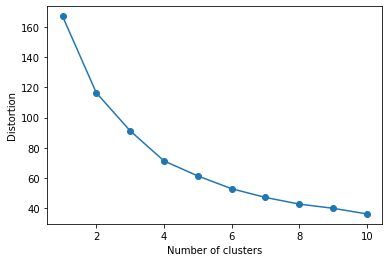

In [167]:
plot_distortion(customers_scaled.iloc[:,:4], max_clusters = 10)

In [168]:
# # set up k_means params
# km = KMeans(n_clusters=4,
#             n_init=10,
#             random_state=0)

In [169]:
# # fit and predict
# y_km = km.fit_predict(customers_scaled.iloc[:,:4])
# y_km

In [170]:
# customers_scaled['cluster_nogeo'] = y_km
# customers_scaled

In [171]:
# radar_scaled = customers_scaled.groupby('cluster_nogeo').mean()
# radar_scaled

In [195]:
# Change marital to numberic
customers_scaled.loc[:,'Marital_1':'Marital_4'] = customers_scaled.loc[:,'Marital_1':'Marital_4'].astype(int)

In [196]:
customers_scaled.dtypes

income             float64
age                float64
years_with_bank    float64
nbr_children       float64
Marital_1            int64
Marital_2            int64
Marital_3            int64
Marital_4            int64
cluster              int32
dtype: object

In [197]:
# change fill

def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i].values,
                                        theta=data.columns,
                                        name=str(data.index[i]),
                                        # fill='toself' # <-change this
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [198]:
def scatterPlot(data,title):
    fig = px.scatter(data, x="PC1", y="PC2", color='cluster',title=title + str(n))
    fig.show()

In [202]:
customers_scaled

,income,age,years_with_bank,nbr_children,Marital_1,Marital_2,Marital_3,Marital_4,cluster
0,0.181399,0.434211,0.555556,0.2,0,1,0,0,0
1,0.045818,0.763158,0.111111,0.0,0,1,0,0,0
2,0.128665,0.328947,0.888889,0.0,1,0,0,0,1
3,0.330667,0.539474,0.333333,0.0,1,0,0,0,1
4,0.309066,0.605263,1.000000,0.4,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,1,2
743,0.183043,0.565789,0.666667,0.2,0,1,0,0,0
744,0.425231,0.486842,0.000000,0.4,0,1,0,0,0
745,0.104747,0.315789,0.777778,0.0,0,1,0,0,0


In [199]:
def clustering(data, n_clusters, title):
    # Set up clustering
    km = KMeans(n_clusters=n_clusters,
        n_init=10,
        random_state=0)

    # fit & predict the clusters
    y_km = km.fit_predict(data)
    y_km

    # assign clusters to observations
    data['cluster'] = y_km
    data

    # group up for a radar chart
    grouped_data = data.groupby('cluster').mean()
    print(grouped_data.dtypes)
    grouped_data

    # plot the radar chart
    plotRadarChart(grouped_data, title)

In [203]:
def pcScatter2D(data,n, title):
    # Set up clustering
    km = KMeans(n_clusters=n,
        n_init=10,
        random_state=0)

    # fit & predict the clusters
    y_km = km.fit_predict(data)
    y_km

    # PCA to 2D
    pca = PCA(n_components=2)
    pca_fit = pca.fit(data)
    pca_fit
    print(data)

    # Column Titles
    pc_columns = []
    for component in range(2):
        pc_columns.append('PC' + str(component+1))

    #make PC dataframe
    principal_components = pd.DataFrame(pca.fit_transform(data), 
                                    columns=pc_columns)

    # append k-means cluster to PC dataframe
    principal_components['cluster'] = y_km
    print(principal_components)

    # plot the 2D scatter
    scatterPlot(principal_components, title)

In [204]:
clustering(customers_scaled, 4, 'Demo Clusters')

income             float64
age                float64
years_with_bank    float64
nbr_children       float64
Marital_1          float64
Marital_2          float64
Marital_3          float64
Marital_4          float64
dtype: object


In [188]:
customers_scaled

,income,age,years_with_bank,nbr_children,Marital_1,Marital_2,Marital_3,Marital_4,cluster
0,0.181399,0.434211,0.555556,0.2,0,1,0,0,1
1,0.045818,0.763158,0.111111,0.0,0,1,0,0,1
2,0.128665,0.328947,0.888889,0.0,1,0,0,0,0
3,0.330667,0.539474,0.333333,0.0,1,0,0,0,0
4,0.309066,0.605263,1.000000,0.4,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,1,3
743,0.183043,0.565789,0.666667,0.2,0,1,0,0,1
744,0.425231,0.486842,0.000000,0.4,0,1,0,0,1
745,0.104747,0.315789,0.777778,0.0,0,1,0,0,1


In [205]:
for n in list(range(3,10)):
    pcScatter2D(customers_scaled,n,"Demographic Clusters ")
    

       income       age  years_with_bank  nbr_children  Marital_1  Marital_2  \
0    0.181399  0.434211         0.555556           0.2          0          1   
1    0.045818  0.763158         0.111111           0.0          0          1   
2    0.128665  0.328947         0.888889           0.0          1          0   
3    0.330667  0.539474         0.333333           0.0          1          0   
4    0.309066  0.605263         1.000000           0.4          0          0   
..        ...       ...              ...           ...        ...        ...   
742  0.102631  0.302632         0.666667           0.2          0          0   
743  0.183043  0.565789         0.666667           0.2          0          1   
744  0.425231  0.486842         0.000000           0.4          0          1   
745  0.104747  0.315789         0.777778           0.0          0          1   
746  0.123997  0.065789         0.333333           0.0          1          0   

     Marital_3  Marital_4  cluster  
0 

       income       age  years_with_bank  nbr_children  Marital_1  Marital_2  \
0    0.181399  0.434211         0.555556           0.2          0          1   
1    0.045818  0.763158         0.111111           0.0          0          1   
2    0.128665  0.328947         0.888889           0.0          1          0   
3    0.330667  0.539474         0.333333           0.0          1          0   
4    0.309066  0.605263         1.000000           0.4          0          0   
..        ...       ...              ...           ...        ...        ...   
742  0.102631  0.302632         0.666667           0.2          0          0   
743  0.183043  0.565789         0.666667           0.2          0          1   
744  0.425231  0.486842         0.000000           0.4          0          1   
745  0.104747  0.315789         0.777778           0.0          0          1   
746  0.123997  0.065789         0.333333           0.0          1          0   

     Marital_3  Marital_4  cluster  
0 

       income       age  years_with_bank  nbr_children  Marital_1  Marital_2  \
0    0.181399  0.434211         0.555556           0.2          0          1   
1    0.045818  0.763158         0.111111           0.0          0          1   
2    0.128665  0.328947         0.888889           0.0          1          0   
3    0.330667  0.539474         0.333333           0.0          1          0   
4    0.309066  0.605263         1.000000           0.4          0          0   
..        ...       ...              ...           ...        ...        ...   
742  0.102631  0.302632         0.666667           0.2          0          0   
743  0.183043  0.565789         0.666667           0.2          0          1   
744  0.425231  0.486842         0.000000           0.4          0          1   
745  0.104747  0.315789         0.777778           0.0          0          1   
746  0.123997  0.065789         0.333333           0.0          1          0   

     Marital_3  Marital_4  cluster  
0 

       income       age  years_with_bank  nbr_children  Marital_1  Marital_2  \
0    0.181399  0.434211         0.555556           0.2          0          1   
1    0.045818  0.763158         0.111111           0.0          0          1   
2    0.128665  0.328947         0.888889           0.0          1          0   
3    0.330667  0.539474         0.333333           0.0          1          0   
4    0.309066  0.605263         1.000000           0.4          0          0   
..        ...       ...              ...           ...        ...        ...   
742  0.102631  0.302632         0.666667           0.2          0          0   
743  0.183043  0.565789         0.666667           0.2          0          1   
744  0.425231  0.486842         0.000000           0.4          0          1   
745  0.104747  0.315789         0.777778           0.0          0          1   
746  0.123997  0.065789         0.333333           0.0          1          0   

     Marital_3  Marital_4  cluster  
0 

       income       age  years_with_bank  nbr_children  Marital_1  Marital_2  \
0    0.181399  0.434211         0.555556           0.2          0          1   
1    0.045818  0.763158         0.111111           0.0          0          1   
2    0.128665  0.328947         0.888889           0.0          1          0   
3    0.330667  0.539474         0.333333           0.0          1          0   
4    0.309066  0.605263         1.000000           0.4          0          0   
..        ...       ...              ...           ...        ...        ...   
742  0.102631  0.302632         0.666667           0.2          0          0   
743  0.183043  0.565789         0.666667           0.2          0          1   
744  0.425231  0.486842         0.000000           0.4          0          1   
745  0.104747  0.315789         0.777778           0.0          0          1   
746  0.123997  0.065789         0.333333           0.0          1          0   

     Marital_3  Marital_4  cluster  
0 

       income       age  years_with_bank  nbr_children  Marital_1  Marital_2  \
0    0.181399  0.434211         0.555556           0.2          0          1   
1    0.045818  0.763158         0.111111           0.0          0          1   
2    0.128665  0.328947         0.888889           0.0          1          0   
3    0.330667  0.539474         0.333333           0.0          1          0   
4    0.309066  0.605263         1.000000           0.4          0          0   
..        ...       ...              ...           ...        ...        ...   
742  0.102631  0.302632         0.666667           0.2          0          0   
743  0.183043  0.565789         0.666667           0.2          0          1   
744  0.425231  0.486842         0.000000           0.4          0          1   
745  0.104747  0.315789         0.777778           0.0          0          1   
746  0.123997  0.065789         0.333333           0.0          1          0   

     Marital_3  Marital_4  cluster  
0 

       income       age  years_with_bank  nbr_children  Marital_1  Marital_2  \
0    0.181399  0.434211         0.555556           0.2          0          1   
1    0.045818  0.763158         0.111111           0.0          0          1   
2    0.128665  0.328947         0.888889           0.0          1          0   
3    0.330667  0.539474         0.333333           0.0          1          0   
4    0.309066  0.605263         1.000000           0.4          0          0   
..        ...       ...              ...           ...        ...        ...   
742  0.102631  0.302632         0.666667           0.2          0          0   
743  0.183043  0.565789         0.666667           0.2          0          1   
744  0.425231  0.486842         0.000000           0.4          0          1   
745  0.104747  0.315789         0.777778           0.0          0          1   
746  0.123997  0.065789         0.333333           0.0          1          0   

     Marital_3  Marital_4  cluster  
0 

In [179]:
def dbScanScatter(data,n,eps,title):
    # Set up clustering w DBSCAN
    km = DBSCAN(eps=eps,
        min_samples=n,
        metric='euclidean')

    # fit & predict the clusters
    y_km = km.fit_predict(data)
    y_km

    # Column Titles
    pc_columns = []
    for component in range(2):
        pc_columns.append('PC' + str(component+1))

    # PCA to 2D
    pca = PCA(n_components=2)
    pca_fit = pca.fit(data)
    pca_fit

    #make PC dataframe
    principal_components = pd.DataFrame(pca.fit_transform(data), 
                                    columns=pc_columns)

    # append dbscan cluster to PC dataframe
    principal_components['cluster'] = y_km

    if (5 < principal_components['cluster'].nunique()) & (principal_components['cluster'].nunique() < 12):
        # plot the 2D scatter
        scatterPlot(principal_components, title)

In [180]:
# run DBscan on all features
eps=0.005
for n in list(range(2,100)):
    dbScanScatter(customers_scaled.iloc[:,:4],6,eps,"Demographic Clusters ")
    eps += 0.005


# Let's try and use the geo data

In [181]:


# We need PCA to make the cities usable, how many PCs?

def screePlot(data, n_components=10):
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit(data)
    pca_fit

    PC_values = np.arange(pca.n_components_) + 1
    PC_values

    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

screePlot(customers_scaled.iloc[:,:-1])

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=8 with svd_solver='full'

In [ ]:
# plot with 8 PCs

n_components = 8

pca = PCA(n_components=n_components)
pc_columns = []
for component in range(n_components):
    pc_columns.append('PC' + str(component+1))
        
principal_components = pd.DataFrame(pca.fit_transform(customers_scaled.iloc[:,:-1]), 
                                    columns=pc_columns)
principal_components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.043776,-0.010024,-0.191405,-0.062530,-0.027770,0.081375,-0.055179,-0.046090
1,-0.496281,0.531185,0.470622,-0.017320,0.492473,-0.223550,-0.068398,0.045778
2,-0.512174,0.832705,0.041043,0.126261,-0.156185,-0.204154,0.100881,0.021244
3,-0.510349,0.615006,0.375267,0.058882,0.280818,-0.147679,0.012972,0.029945
4,0.843436,0.552503,-0.262964,0.211199,-0.037243,0.289318,0.135787,-0.025746
...,...,...,...,...,...,...,...,...
742,-0.530915,0.713009,0.229001,0.138825,-0.101995,-0.032783,0.077042,0.006452
743,0.838448,0.377223,-0.007567,0.122903,0.032614,0.067970,0.066609,0.000863
744,-0.069073,-0.276448,0.227236,-0.079372,0.279276,0.327577,-0.126570,-0.070794
745,-0.038147,0.076366,-0.327835,-0.072704,-0.228795,-0.133599,-0.026755,-0.028580


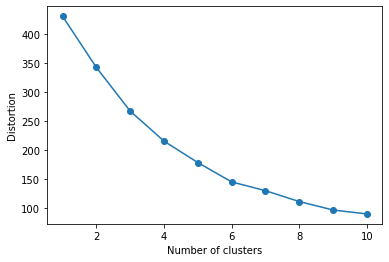

In [ ]:
plot_distortion(principal_components, max_clusters = 10)

In [ ]:
# set up k_means params
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [ ]:
y_km = km.fit_predict(principal_components)
y_km

array([0, 2, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 3, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 3, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 3, 2,
       0, 1, 0, 2, 0, 0, 0, 1, 3, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0,
       0, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 3, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 0,
       3, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 3, 0, 0, 3, 1, 0, 3, 1, 0,

In [ ]:
principal_components['cluster_wgeo'] = y_km
principal_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster_wgeo
0,-0.043776,-0.010024,-0.191405,-0.062530,-0.027770,0.081375,-0.055179,-0.046090,0
1,-0.496281,0.531185,0.470622,-0.017320,0.492473,-0.223550,-0.068398,0.045778,2
2,-0.512174,0.832705,0.041043,0.126261,-0.156185,-0.204154,0.100881,0.021244,2
3,-0.510349,0.615006,0.375267,0.058882,0.280818,-0.147679,0.012972,0.029945,2
4,0.843436,0.552503,-0.262964,0.211199,-0.037243,0.289318,0.135787,-0.025746,1
...,...,...,...,...,...,...,...,...,...
742,-0.530915,0.713009,0.229001,0.138825,-0.101995,-0.032783,0.077042,0.006452,2
743,0.838448,0.377223,-0.007567,0.122903,0.032614,0.067970,0.066609,0.000863,1
744,-0.069073,-0.276448,0.227236,-0.079372,0.279276,0.327577,-0.126570,-0.070794,0
745,-0.038147,0.076366,-0.327835,-0.072704,-0.228795,-0.133599,-0.026755,-0.028580,0


In [ ]:
radar_scaled_pca = principal_components.groupby('cluster_wgeo').mean()
radar_scaled_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
cluster_wgeo,,,,,,,,
0,-0.055367,-0.101385,-0.087085,-0.123552,-0.019888,0.025033,-0.027585,-0.006347
1,0.820465,0.234816,0.215386,0.093435,-0.006219,-0.008593,0.040277,0.008715
2,-0.531113,0.622242,0.369535,0.108184,0.050259,-0.043051,0.043736,0.012604
3,-0.135894,-0.422774,-0.139687,0.797209,0.116259,-0.147914,0.114642,0.023536
